<a href="https://colab.research.google.com/github/imZiho/Deep-Learning_Seminar/blob/main/cha5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache direc

In [2]:
# 필요 라이브러리 설치

!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

In [3]:
# 라이브러리 임포트

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchviz import make_dot

In [5]:
# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

## 5.3 선형 함수(nn.Linear)
직선을 갖는 함수로 일반적으로 1차함수

1입력 1출력

In [6]:
torch.manual_seed(123)
l1 = nn.Linear(1,1)
print(l1)             #  bias는 모델을 통해 얻은 예측값과 실제 정답과의 차이의 평균을 나타냄

Linear(in_features=1, out_features=1, bias=True)


In [7]:
for param in l1.named_parameters():
  print('name:',param[0])
  print('tensor:',param[1])
  print('shape:',param[1].shape)

name: weight
tensor: Parameter containing:
tensor([[-0.4078]], requires_grad=True)
shape: torch.Size([1, 1])
name: bias
tensor: Parameter containing:
tensor([0.0331], requires_grad=True)
shape: torch.Size([1])


In [8]:
nn.init.constant_(l1.weight,2.0)
nn.init.constant_(l1.bias,1.0)
print(l1.weight)
print(l1.bias)

Parameter containing:
tensor([[2.]], requires_grad=True)
Parameter containing:
tensor([1.], requires_grad=True)


In [9]:
x_xp = np.arange(-2,2.1,1)
x = torch.tensor(x_xp).float()
x = x.view(-1,1)        # 뷰(view)는 원소수는 유지하면서 텐서의 크기 변경
print(x.shape)          # 파이토치 텐서의 뷰는 넘파이에서 reshape같은 역활을 한다(텐서의 크기 변경)
print(x)                # 여기서 (-1,1)이라는 것은 -1부분은 파이토치가 알아서 정하고 차원의 길이는 1을 가지도록 하라는 뜻

torch.Size([5, 1])
tensor([[-2.],
        [-1.],
        [ 0.],
        [ 1.],
        [ 2.]])


In [10]:
y = l1(x)
print(y.shape)
print(y.data)

torch.Size([5, 1])
tensor([[-3.],
        [-1.],
        [ 1.],
        [ 3.],
        [ 5.]])


2입력 1출력

In [11]:
l2 = nn.Linear(2,1)
nn.init.constant_(l2.weight,1.0)
nn.init.constant_(l2.bias,2.0)
print(l2.weight)
print(l2.bias)

Parameter containing:
tensor([[1., 1.]], requires_grad=True)
Parameter containing:
tensor([2.], requires_grad=True)


In [12]:
x2_np= np.array([[0,0],[0,1],[1,0],[1,1]])
x2 = torch.tensor(x2_np).float()
print(x2.shape)
print(x2)

torch.Size([4, 2])
tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [13]:
y2 = l2(x2)
print(y2.shape)
print(y2.data)

torch.Size([4, 1])
tensor([[2.],
        [3.],
        [3.],
        [4.]])


2입력 3출력

In [14]:
l3 = nn.Linear(2,3)
nn.init.constant_(l3.weight[0,:],1.0)
nn.init.constant_(l3.weight[1,:],2.0)
nn.init.constant_(l3.weight[2,:],3.0)
nn.init.constant_(l3.bias,2.0)
print(l3.weight)
print(l3.bias)

Parameter containing:
tensor([[1., 1.],
        [2., 2.],
        [3., 3.]], requires_grad=True)
Parameter containing:
tensor([2., 2., 2.], requires_grad=True)


In [15]:
y3  =l3(x2)
print(y3.shape)
print(y3.data)

torch.Size([4, 3])
tensor([[2., 2., 2.],
        [3., 4., 5.],
        [3., 4., 5.],
        [4., 6., 8.]])


**커스텀 클래스를 이용한 모델 정의**

In [16]:
class Net(nn.Module):
    def __init__(self, n_input, n_output):
        #  부모 클래스 nn.Module 초기화
        super().__init__()

        # 출력층 정의
        self.l1 = nn.Linear(n_input, n_output)

    # 예측 함수 정의
    def forward(self, x):
        x1 = self.l1(x) # 선형 회귀
        return x1

In [17]:
inputs = torch.ones(100,1)

# 인스턴스 생성(１ 입력, 1 출력 선형 모델)
n_input = 1
n_output = 1
net = Net(n_input, n_output)

# 예측
outputs = net(inputs)

**MSELoss 클래스를 이용한 손실 함수**

손실함수는 모델의 정확도를 평가하는 함수

손실함수는 weight와 bias를 이용하여 계산 함

손실함수는 예측한 값과 실제 정답의 차이를 비교하기 위한 함수로, 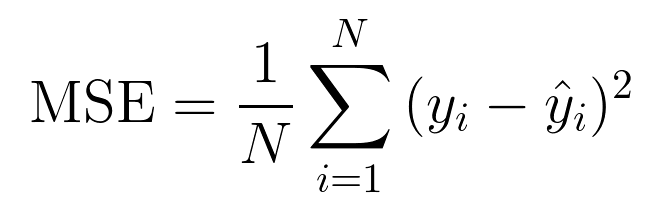




여기서 와이햇은 예측값, y는 실제값, 제곱하는 이유는 -를 제거하기 위함.


따라서 예측값과 실제값을 빼서 제곱해서 loss를 구한 후 여기서 loss를 최소화하는 값을 찾으면 모델이 정확한 모델이 된다


# 실습

In [20]:
# '보스턴 데이터셋'은 현재 사이킷런 라이브러리에서 가져올 수 있지만,
# 사이킷런에서 앞으로 이 데이터를 사용할 수 없기 때문에 웹 url에서 직접 수집

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+",
                     skiprows=22, header=None)
x_org = np.hstack([raw_df.values[::2, :],
                   raw_df.values[1::2, :2]])
yt = raw_df.values[1::2, 2]
feature_names = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
                          'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT'])

# 결과 확인
print('원본 데이터', x_org.shape, yt.shape)
print('항목명: ', feature_names)

원본 데이터 (506, 13) (506,)
항목명:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [21]:
# 데이터 추출(RM 항목)
x = x_org[:,feature_names == 'RM']
print('추출 후', x.shape)
print(x[:5,:])

# 정답 데이터 y 표시
print('정답 데이터')
print(yt[:5])

추출 후 (506, 1)
[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]]
정답 데이터
[24.  21.6 34.7 33.4 36.2]


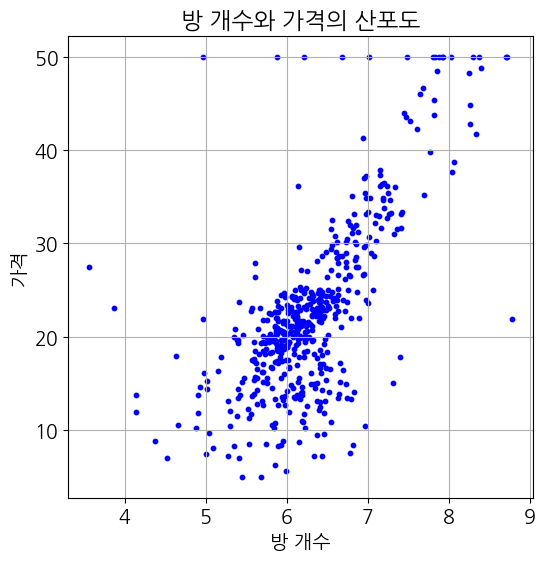

In [22]:
# 산포도 출력

plt.scatter(x, yt, s=10, c='b')
plt.xlabel('방 개수')
plt.ylabel('가격')
plt.title('방 개수와 가격의 산포도')
plt.show()

# 모델 정의

In [23]:
# 변수 정의

# 입력 차원수
n_input= x.shape[1]

# 출력 차원수
n_output = 1

print(f'입력 차원수: {n_input}  출력 차원수: {n_output}')

입력 차원수: 1  출력 차원수: 1


In [24]:
# 머신러닝 모델(예측 모델)의 클래스 정의

class Net(nn.Module):
    def __init__(self, n_input, n_output):
        #  부모 클래스 nn.Module 초기화
        super().__init__()

        # 출력층 정의
        self.l1 = nn.Linear(n_input, n_output)

        # 초깃값을 모두 1로 설정
        # "딥러닝을 위한 수학"과 조건을 맞추기 위함
        nn.init.constant_(self.l1.weight, 1.0)
        nn.init.constant_(self.l1.bias, 1.0)

    # 예측 함수 정의
    def forward(self, x):
        x1 = self.l1(x) # 선형 회귀
        return x1

In [25]:
# 인스턴스 생성
# １입력 1출력 선형 모델

net = Net(n_input, n_output)

In [26]:
# 모델 안의 파라미터를 확인
# 모델 안의 변수를 가져오기 위해 named_parameters 함수를 사용함
# 첫번째 요소는 변수명, 두번째 요소가 변숫값
#
# predict.weight와 predict.bias 파라미터가 존재함
# 초깃값은 두 파라미터 모두 1.0

for parameter in net.named_parameters():
    print(f'변수명: {parameter[0]}')
    print(f'변숫값: {parameter[1].data}')

변수명: l1.weight
변숫값: tensor([[1.]])
변수명: l1.bias
변숫값: tensor([1.])


In [27]:
# 파라미터 리스트를 가져오기 위해 parameters 함수를 사용

for parameter in net.parameters():
    print(parameter)

Parameter containing:
tensor([[1.]], requires_grad=True)
Parameter containing:
tensor([1.], requires_grad=True)


모델의 개요 표시

In [28]:
# 모델의 개요 표시 1

print(net)

Net(
  (l1): Linear(in_features=1, out_features=1, bias=True)
)


In [29]:
# 모델의 개요 표시 2

from torchinfo import summary
summary(net, (1,))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1]                       --
├─Linear: 1-1                            [1]                       2
Total params: 2
Trainable params: 2
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

손실 함수와 최적화 함수

In [34]:
# 손실 함수： 평균 제곱 오차
criterion = nn.MSELoss()

# 학습률
lr = 0.01

# 최적화 함수: 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

경사하강법

In [37]:
inputs = torch.tensor(x).float()
labels = torch.tensor(yt).float()

# 차원 수 확인

print(inputs.shape)
print(labels.shape)

torch.Size([506, 1])
torch.Size([506])


In [38]:
labels1 = labels.view((-1, 1))

# 차원 수 확인
print(labels1.shape)

torch.Size([506, 1])


1. 예측계산
2. 손실계산
3. 경사계산
4. 파라미터 수정

In [39]:
# 예측 계산

outputs = net(inputs)

In [40]:

# 손실 계산
loss = criterion(outputs, labels1)

# 손실 값 가져오기
print(f'{loss.item():.5f}')

473.96295


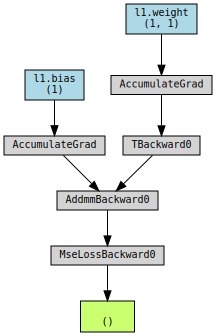

In [41]:
# 손실을 그래프로 나타내기

g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

In [42]:
# 예측 계산
outputs = net(inputs)

# 손실 계산
loss = criterion(outputs, labels1)

# 경사 계산
loss.backward()

# 경사 계산 결과를 취득 가능하도록 함
print(net.l1.weight.grad)
print(net.l1.bias.grad)

tensor([[-257.6296]])
tensor([-39.6167])


In [43]:
# 파라미터 수정
optimizer.step()

# 파라미터 확인
print(net.l1.weight)
print(net.l1.bias)

Parameter containing:
tensor([[2.8973]], requires_grad=True)
Parameter containing:
tensor([1.1033], requires_grad=True)


In [44]:
# 경삿값 초기화
optimizer.zero_grad()

# 경삿값을 모두 0으로 함
print(net.l1.weight.grad)
print(net.l1.bias.grad)

None
None


In [45]:
# 학습률
lr = 0.01

# 인스턴스 생성(파라미터 값 초기화)
net = Net(n_input, n_output)

# 손실 함수：평균 제곱 오차
criterion = nn.MSELoss()

# 최적화 함수 : 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

# 반복 횟수
num_epochs = 50000

# 평가 결과 기록(손실 값만 기록)
history = np.zeros((0,2))

In [46]:
# 반복 계산 메인 루프

for epoch in range(num_epochs):

    # 경삿값 초기화
    optimizer.zero_grad()

    # 예측 계산
    outputs = net(inputs)

    # 손실 계산
    # "딥러닝을 위한 수학"에 나온 결과와 맞추기 위해 2로 나눈 값을 손실로 정의
    loss = criterion(outputs, labels1) / 2.0

    # 경사 계산
    loss.backward()

    # 파라미터 수정
    optimizer.step()

    # 100회 마다 도중 경과를 기록
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 263.74506
Epoch 100 loss: 29.36623
Epoch 200 loss: 29.18646
Epoch 300 loss: 29.01095
Epoch 400 loss: 28.83961
Epoch 500 loss: 28.67234
Epoch 600 loss: 28.50905
Epoch 700 loss: 28.34963
Epoch 800 loss: 28.19401
Epoch 900 loss: 28.04209
Epoch 1000 loss: 27.89377
Epoch 1100 loss: 27.74898
Epoch 1200 loss: 27.60762
Epoch 1300 loss: 27.46963
Epoch 1400 loss: 27.33492
Epoch 1500 loss: 27.20340
Epoch 1600 loss: 27.07502
Epoch 1700 loss: 26.94968
Epoch 1800 loss: 26.82732
Epoch 1900 loss: 26.70787
Epoch 2000 loss: 26.59126
Epoch 2100 loss: 26.47741
Epoch 2200 loss: 26.36627
Epoch 2300 loss: 26.25778
Epoch 2400 loss: 26.15186
Epoch 2500 loss: 26.04846
Epoch 2600 loss: 25.94752
Epoch 2700 loss: 25.84897
Epoch 2800 loss: 25.75277
Epoch 2900 loss: 25.65885
Epoch 3000 loss: 25.56716
Epoch 3100 loss: 25.47765
Epoch 3200 loss: 25.39027
Epoch 3300 loss: 25.30497
Epoch 3400 loss: 25.22169
Epoch 3500 loss: 25.14039
Epoch 3600 loss: 25.06102
Epoch 3700 loss: 24.98354
Epoch 3800 loss: 24.907

결과확인

In [47]:
# 초기 손실값과 최종 손실값

print(f'초기 손실값: {history[0,1]:.5f}')
print(f'최종 손실값: {history[-1,1]:.5f}')

초기 손실값: 263.74506
최종 손실값: 21.80032


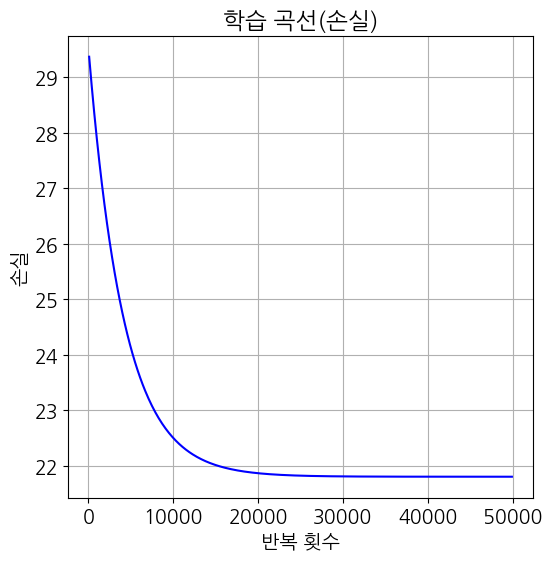

In [48]:
# 학습 곡선 출력(손실)
# 가장 처음 요소는 제외

plt.plot(history[1:,0], history[1:,1], 'b')
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.title('학습 곡선(손실)')
plt.show()

In [49]:
# 회귀 직선 산출

# x의 최솟값, 최댓값
xse = np.array((x.min(), x.max())).reshape(-1,1)
Xse = torch.tensor(xse).float()

with torch.no_grad():
  Yse = net(Xse)

print(Yse.numpy())

[[-2.2195]
 [45.2127]]


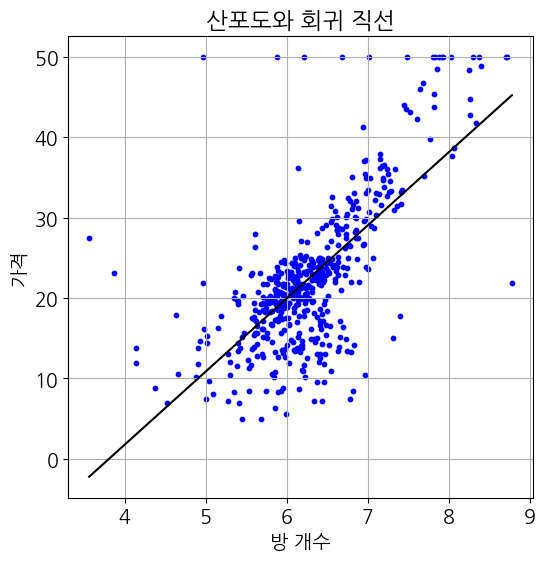

In [50]:
# 산포도와 회귀 직선 출력

plt.scatter(x, yt, s=10, c='b')
plt.xlabel('방 개수')
plt.ylabel('가격')
plt.plot(Xse.data, Yse.data, c='k')
plt.title('산포도와 회귀 직선')
plt.show()